# В данном ноутбуке представлен код дообучения YOLOv8n

In [9]:
from ultralytics import YOLO
import os
from roboflow import Roboflow
from IPython.display import display, Image
import torch

In [10]:
print(torch.cuda.is_available())  # Должно вернуть True
print(torch.cuda.device_count())  # Должно показать количество доступных GPU

True
1


In [11]:
%cd D:\Detecting_and_rendering_people_2.0\tun_and_rec
HOME = os.getcwd()
parent_directory = os.path.dirname(HOME)

D:\Detecting_and_rendering_people_2.0\tun_and_rec


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


### (create model + train) Здесь подгружаем yolov8N (самую маленькую и быструю модель), её будет достаточно для поставленной задачи (и в целях экономии времени)

In [12]:
%cd {HOME}
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = YOLO('yolov8n.pt').to('cpu')
torch.cuda.empty_cache()

D:\Detecting_and_rendering_people_2.0\tun_and_rec


### В качестве гиперпараметров я выбрал базовые, их должно хватить, но из-за их большого количества, я предполагаю, что в будущем их можно потюнить и выбрать наилучшие

In [13]:
model.train(data="../pershel2.yaml",
            task='detect',
            imgsz=640,
            epochs=25,
            batch=12,
            mode='train',
            name='yolov8n_v1_train')

New https://pypi.org/project/ultralytics/8.2.63 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=../pershel2.yaml, epochs=25, patience=50, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=yolov8n_v1_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000200CCA2B850>
fitness: 0.571109036983693
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.55131,     0.51645])
names: {0: 'person', 1: 'Hardhat'}
plot: True
results_dict: {'metrics/precision(B)': 0.9558576476505218, 'metrics/recall(B)': 0.8060363753531424, 'metrics/mAP50(B)': 0.9061762481668898, 'metrics/mAP50-95(B)': 0.5338793468522267, 'fitness': 0.571109036983693}
save_dir: WindowsPath('D:/Detecting_and_rendering_people_2.0/runs/detect/yolov8n_v1_train18')
speed: {'preprocess': 1.4390538378459652, 'inference': 88.0250814484387, 'loss': 0.0, 'postprocess': 0.7072367319246619}

### В результате обучения на 10 эпохах mAP50 = 0.689, что достаточно плохо и следовало бы увеличить кол-во эпох, потому что по обучению видно, что результат улучшается, но я использовал GPU при обучении, из-за чего потребовалось 2.5ч на 10 эпох. При использовании CPU скорость обучения ускориться и можно смело брать больше эпох (20-30)

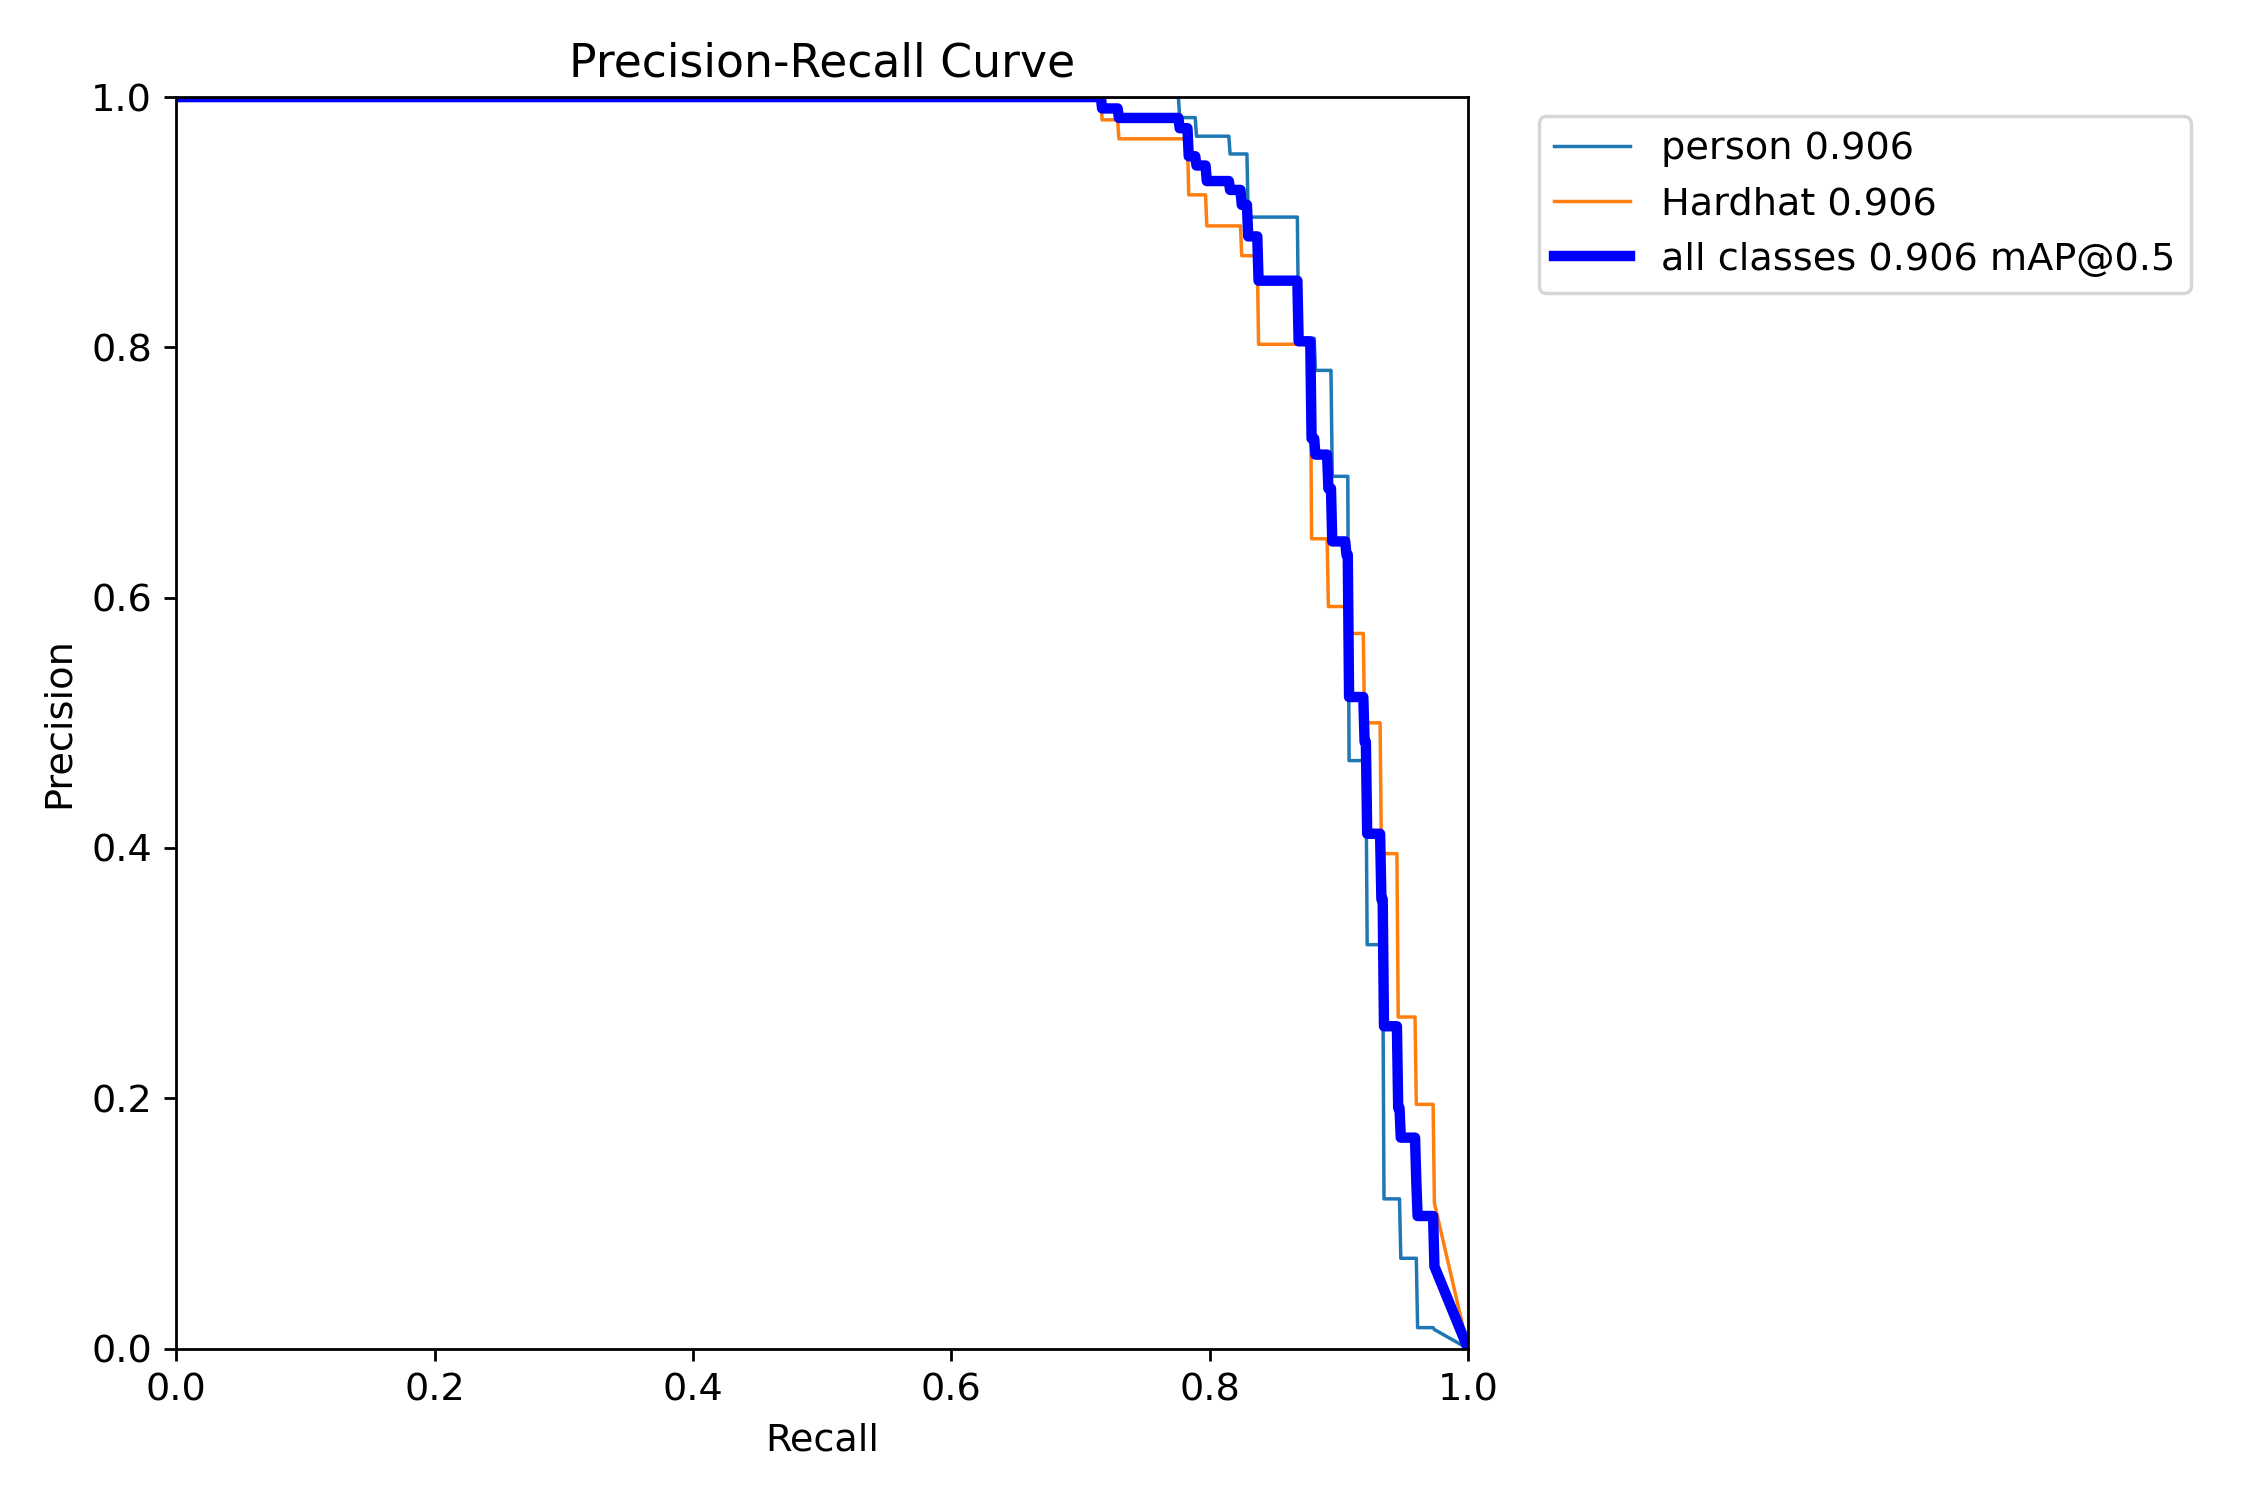

In [14]:
Image(filename=f'{parent_directory}/runs/detect/yolov8n_v1_train18/PR_curve.png', width=800)

### По матрице ошибок видно, что доля отрицательно предсказанных классов минимальна (не выше 0.05), что хорошо

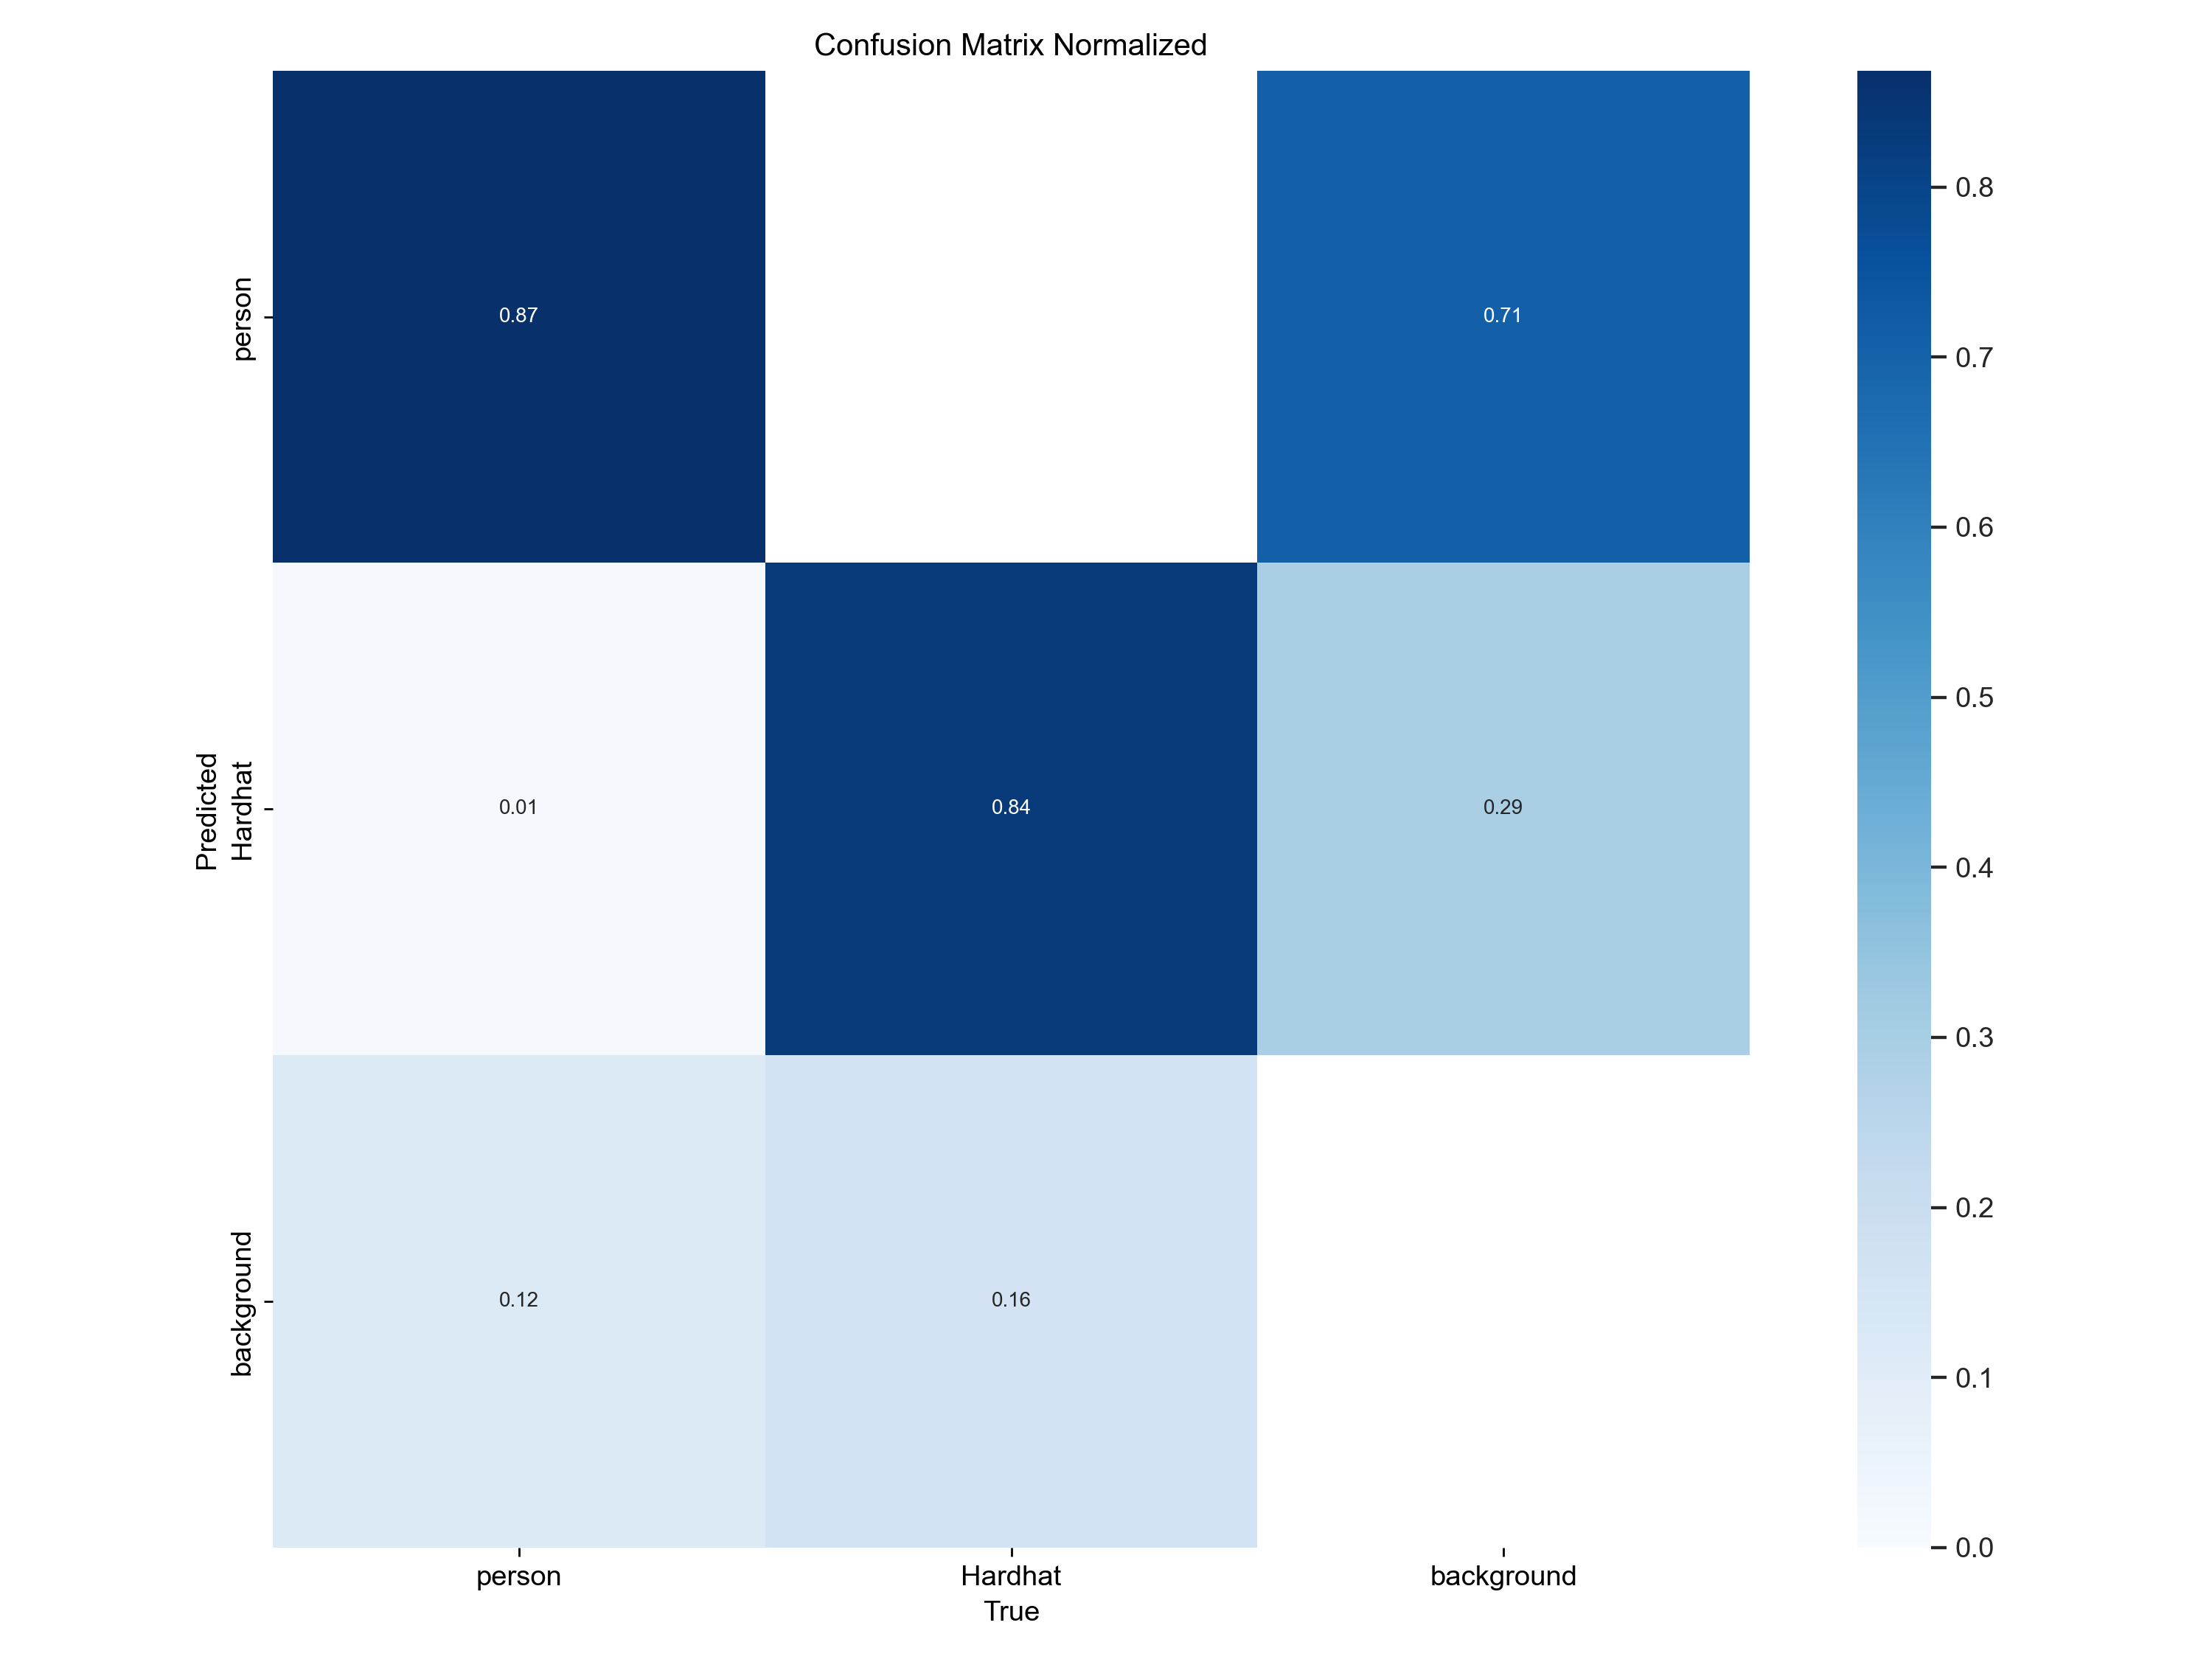

In [16]:
Image(filename=f'{parent_directory}/runs/detect/yolov8n_v1_train18/confusion_matrix_normalized.png', width=800)

### Проверим модель на test сете

In [21]:
model = YOLO('../runs/detect/yolov8n_v1_train18/weights/best.pt')

result = model.predict(
    source="D:/Detecting_and_rendering_people_2.0/tun_and_rec/datasets/my_own_dataset/test/",
    save = True
)


image 1/8 D:\Detecting_and_rendering_people_2.0\tun_and_rec\datasets\my_own_dataset\test\image_from_china-1390-_jpg.rf.6308ad6e460593f2e4c1f9e150685ae8.jpg: 640x640 2 persons, 1 Hardhat, 10.0ms
image 2/8 D:\Detecting_and_rendering_people_2.0\tun_and_rec\datasets\my_own_dataset\test\image_from_china-1401-_jpg.rf.17d11069a97ccf5cac519b31d4f73312.jpg: 640x640 3 persons, 1 Hardhat, 11.0ms
image 3/8 D:\Detecting_and_rendering_people_2.0\tun_and_rec\datasets\my_own_dataset\test\image_from_china-1514-_jpg.rf.a9e0cbf64288b89fb080355b828085c7.jpg: 640x640 1 person, 1 Hardhat, 10.0ms
image 4/8 D:\Detecting_and_rendering_people_2.0\tun_and_rec\datasets\my_own_dataset\test\image_from_china-1570-_jpg.rf.867285b0f5554c4ec92535d3a4e3bb93.jpg: 640x640 2 persons, 2 Hardhats, 10.0ms
image 5/8 D:\Detecting_and_rendering_people_2.0\tun_and_rec\datasets\my_own_dataset\test\image_from_china-336-_jpg.rf.68f928a6067765981c64a8552a6f7a45.jpg: 640x640 2 persons, 1 Hardhat, 10.0ms
image 6/8 D:\Detecting_and_ren

### Выведу пару изображений. Я понимаю, что на них используются больше классов чем необходимо, но при итоговой детекции, я отберу только нужные классы = Person и Hardhat

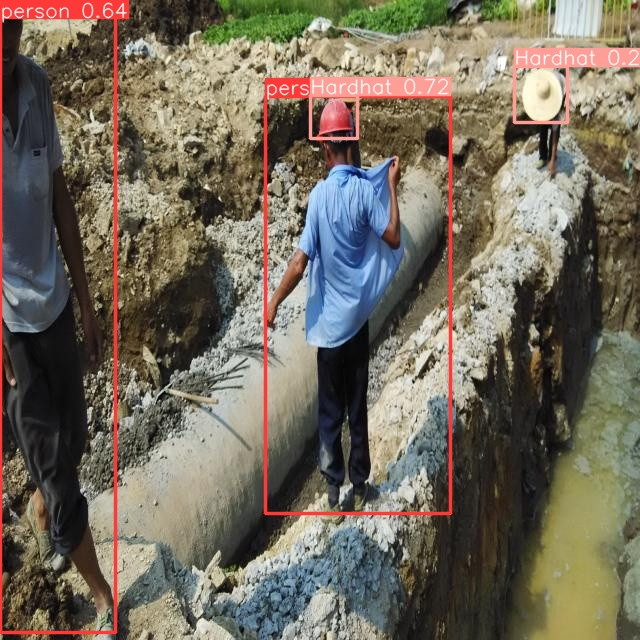

In [22]:
Image(filename=f'{parent_directory}/runs/detect/predict4/image_from_china-1570-_jpg.rf.867285b0f5554c4ec92535d3a4e3bb93.jpg', width=400)


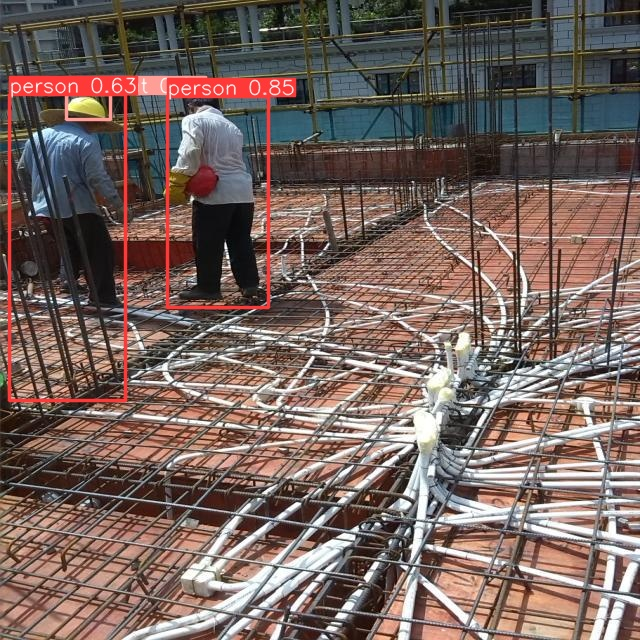

In [27]:
Image(filename=f'{parent_directory}/runs/detect/predict4/image_from_china-1390-_jpg.rf.6308ad6e460593f2e4c1f9e150685ae8.jpg', width=400)

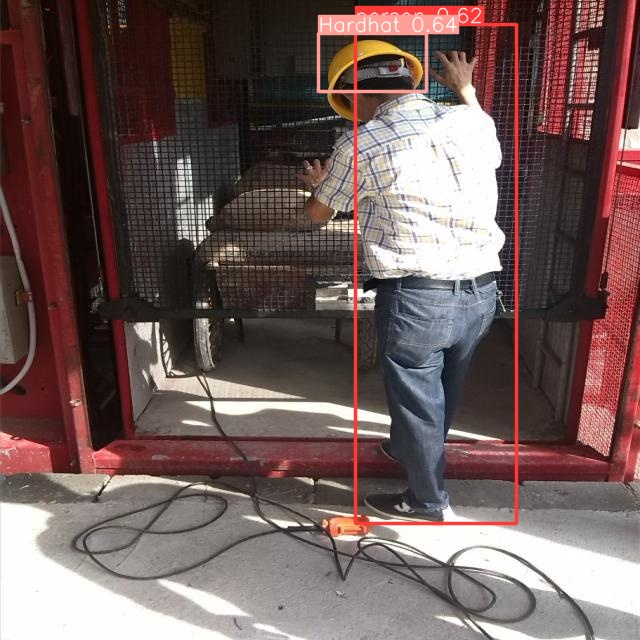

In [25]:
Image(filename=f'{parent_directory}/runs/detect/predict4/image_from_china-1514-_jpg.rf.a9e0cbf64288b89fb080355b828085c7.jpg', width=400)